# 3 - Feature Improvement

## Introduction:

For this project, the aim would be to explore the dataset, apply techniques to clean and augment the data samples where it is needed and predict the final class variable (0 or 1) where if the patient develops diabetes or not. The cleaning process involves altering columns and rows of the dataset, whereas augmenting would to remove the columns and adding columns to the dataset.

## Breakdown of this Project:
- Identify missing values within the dataset.
- Removal of any harmful data points/samples.
- Imputing missing values in the dataset. 
- Nomarlising or Standardising the dataset. 
- Constructing new features in the dataset. 
- Selecting or Removing features both manually and automatically. 
- Utilising matrix computations to transform datasets into different dimensions. 

## Datasets:

This dataset is called Pima Indian Diabetes Prediction and was obtained from the UCI Machine Learning Repository. It can be found in the link below or within this repository.

This dataset consists of 9 columns with 768 rows of data. The usage of this dataset was intended to be used for predicting the onset of diabetes in patients within the next five years to come for females. The females here are from the Pima Indian Heritage where they are of age 21 and over. 

### Preview of the columns in this dataset:

1. Number of times pregnant.
2. Plasma Glucose Concentration (2 hrs in an oral glucose tolerance test).
3. Diatolic Blood Pressure (mm Hg)
4. Triceps skinfold thickness (mm)
5. 2-Hr serum insuli measurement (mu U/ml)
6. Body mass index ( weight in kg/height in $m^{2}$ )
7. Diabetes pedigree funcntion.
8. Age (yrs)
9. Class Variable (0 or 1) - used for prediction.

Dataset Source: https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

## Requirements:

- Pandas
- Numpy
- Matplotlib
- Seaborn


## 1 - Import the Required Libraries:

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns  
import os
%matplotlib inline  

# Apply the visualisation theme:
plt.style.use('fivethirtyeight') 

## 2 - Load in the Dataset:

In [2]:
# Set up pathway to folder:
current_directory = os.getcwd()

dataset_path = os.path.dirname(os.path.realpath(current_directory + '/Dataset/'))
dataset_path = dataset_path + '/Dataset/'
# print(dataset_path)

In [3]:
# Dataset:
pima_diabetes_dat = pd.read_csv(dataset_path + 'pima.data')

### 2.1 - Checkout the Pima Dataset:

In [4]:
pima_diabetes_dat.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


Seems like the column names are missing. To fix this, the column names will be included manually as follows:

In [5]:
# Specify the Column Names:
col_names = ['times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 
             'triceps_thickness', 'serum_insulin', 'bmi', 'pedigree_function', 'age', 
             'onset_diabetes']

# Include the Column Names into the dataset:
pima_diabetes_dat = pd.read_csv(dataset_path + 'pima.data', names = col_names)

# Checkout the dataset:
pima_diabetes_dat.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
pima_diabetes_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   times_pregnant                768 non-null    int64  
 1   plasma_glucose_concentration  768 non-null    int64  
 2   diastolic_blood_pressure      768 non-null    int64  
 3   triceps_thickness             768 non-null    int64  
 4   serum_insulin                 768 non-null    int64  
 5   bmi                           768 non-null    float64
 6   pedigree_function             768 non-null    float64
 7   age                           768 non-null    int64  
 8   onset_diabetes                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 3 - EDA: Exploratory Data Analysis.

This section will go through showing some basic statistics, selection and visualisations of the dataset.

### 3.1 - Basic Statistics:

Taking a look into the 'onser_diabetes' column to determine how many people did or did not develop diabetes.

In [7]:
# Onset Diabetes patients:
pima_diabetes_dat['onset_diabetes'].value_counts(normalize = True)

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

From the above counts, it can be seen that ~35% of the population did get diabetes while ~65% of the people did not. Note that the goal here, as mentioned above in the introduction, is to predict the onset of diabetes based on the patterns within the data. The next stage would be visualise any differences between the patients that did and did not develop diabetes.

### 3.2 - Visualisations: Historgram 

Taking a look to see how 'plasma_glucose_concentration' affects 'onset_diabetes'. Check to see if there is a pattern in the values between the classes of prediction, in terms of plasma_glucose_concentration.

Current Plot is for bmi vs Onset Diabetes


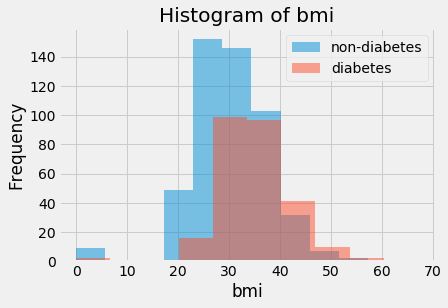

	
Current Plot is for diastolic_blood_pressure vs Onset Diabetes


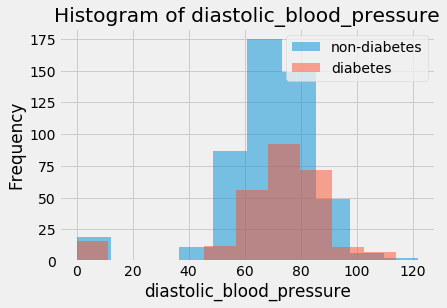

	
Current Plot is for plasma_glucose_concentration vs Onset Diabetes


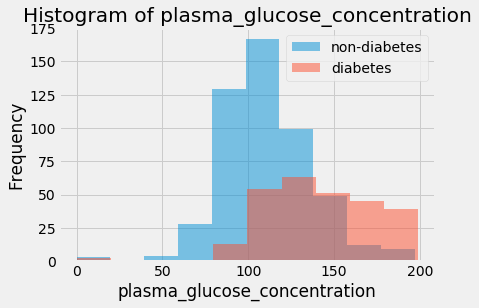

In [8]:
# Get the columns of interest:
col_list = ['bmi', 'diastolic_blood_pressure', 'plasma_glucose_concentration']

# Onset_diabetes pandas conditions:
onset_yes = pima_diabetes_dat['onset_diabetes'] == 1
onset_no = pima_diabetes_dat['onset_diabetes'] == 0

# Plot the Histograms:
for col in col_list:
    print('Current Plot is for {} vs Onset Diabetes'.format(col))

    plt.hist( pima_diabetes_dat[onset_no][col], bins = 10, alpha = 0.5, label = 'non-diabetes')

    plt.hist( pima_diabetes_dat[onset_yes][col], bins = 10, alpha = 0.5, label = 'diabetes')

    plt.legend(loc = 'upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()
    
    print('\t')



### Observations:

From the above histograms, it is obvious that there are big differences between the distributions. For example, taking the plasma_glucose_concentration, the patients that have developed diabetes have a concentration mean of around 130 to 140, while those that don't have a concentration mean of around 110. Similarly for BMI of the patients, those who have developed diabetes have a greater BMI count at around 35, while those that don't have diabetes are around 25. As for diastolic blood pressure, the distributions are similar where the distribution mean are almost the same, where the mean is around 70. Overall, this indicates that plasma glucose concentration and BMI of the body have more significnce which will conribute to the developement of diabetes.

### 3.3 - Correlation: 

Taking a look at the correlation between the different columns of the dataset.

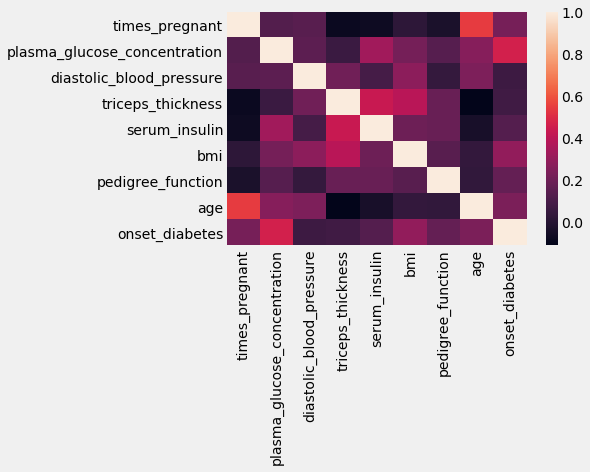

In [9]:
sns.heatmap(pima_diabetes_dat.corr())

### Observation:

As the hot spots in the correlation matrix is highlighted by the red colour, it can be seen that plasma_glucose_concentration does stand out as a major contributing factor to onset diabetes.

### Examine the numerical correlations for the Onset Diabetes Column:


In [10]:
pima_diabetes_dat.corr()['onset_diabetes']

times_pregnant                  0.221898
plasma_glucose_concentration    0.466581
diastolic_blood_pressure        0.065068
triceps_thickness               0.074752
serum_insulin                   0.130548
bmi                             0.292695
pedigree_function               0.173844
age                             0.238356
onset_diabetes                  1.000000
Name: onset_diabetes, dtype: float64

From the numbers above, the plasma_glucose_concentration = 0.466 making it the highest correlated factor. the second highest contributing factor is bmi = 0.292 while the third highest contributing factor is age = 0.238.

From these, it can be said that these three features are important factors towards the prediction of onset diabetes.

## 4 - Missing Values:
